In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [3]:
results = pd.read_csv('results.csv')
results = results.query("simp_algorithm == ['OS','RDP','VW','BU_1', 'BU_2']")
results["dataset"] = results["dataset"].apply(lambda x: x.replace("TEST_normalized", ""))
results["model"] = results["model"].apply(lambda x: x.split(".")[0].replace("_norm", ""))
results.head(5)

,dataset,model,simp_algorithm,performance,comp@loy=0.8,num_segm@loy=0.8,time
0,Adiac,cnn,OS,0.917075,0.0903560214964461,20.734278,0.0
1,Adiac,cnn,RDP,0.829347,0.0944560291671442,2.060606,0.0
2,Adiac,cnn,VW,0.870908,0.106135063164992,8.733547,0.0
3,Adiac,cnn,BU_1,0.822399,0.0895194486965223,4.987528,0.0
4,Adiac,cnn,BU_2,0.763462,0.173324611678759,8.106370,0.0


In [4]:
datasets_paths = [dir for dir in os.listdir('.') if os.path.isdir(dir)]
models_paths = [os.path.join(dir, 'models.csv') for dir in datasets_paths if os.path.isfile(os.path.join(dir, 'models.csv'))]
datasets_models = dict(zip(datasets_paths, models_paths))
datasets_models = {dataset: pd.read_csv(path) for dataset, path in datasets_models.items()}

models_df = pd.DataFrame()
for dataset, models in datasets_models.items():
    models['dataset'] = dataset
    models_df = pd.concat([models_df, models], ignore_index=True)

#models_df["train_acc"] = models_df["train_acc"].astype(float)
#models_df["val_acc"] = models_df["val_acc"].astype(float)
#models_df["test_acc"] = models_df["test_acc"].astype(float)
print(models_df.head(6))


            model_type  train_acc   val_acc  test_acc  \
0        decision-tree   1.000000  0.583333  0.668966   
1  logistic-regression   0.681462  0.625000  0.593103   
2                  cnn   0.940313  0.977188  1.000000   
3                  cnn   0.922742  0.964063  1.000000   
4        decision-tree   0.068273  0.016129  0.033333   
5  logistic-regression   0.068273  0.032258  0.051282   

                       dataset  
0  MiddlePhalanxOutlineCorrect  
1  MiddlePhalanxOutlineCorrect  
2  MiddlePhalanxOutlineCorrect  
3  MiddlePhalanxOutlineCorrect  
4                      FaceAll  
5                      FaceAll  


In [5]:
metadata = pd.read_csv("../data/DataSummary.csv")
metadata = metadata.rename(columns={"Name": "dataset"})
metadata = metadata.drop("Data donor/editor", axis=1)
print(metadata.head(5))


   ID       Type                       dataset  Train   Test   Class  Length  \
0   1      Image                         Adiac     390    391     37     176   
1  90  Simulated                           BME      30    150      3     128   
2   7  Simulated                           CBF      30    900      3     128   
3  91    Traffic                     Chinatown      20    343      2      24   
4  16      Image  DistalPhalanxOutlineAgeGroup     400    139      3      80   

   ED (w=0) DTW (learned_w)   DTW (w=100)  Default rate Stationary  Seasonal  \
0    0.3887       0.3913 (3)       0.3964        0.9591       True      True   
1    0.1667       0.0200 (4)       0.1000        0.6667      False      True   
2    0.1478      0.0044 (11)       0.0033        0.6644      False     False   
3    0.0466       0.0466 (0)       0.0437        0.2741      False     False   
4    0.3741       0.3741 (0)       0.2302        0.5324      False     False   

    Entropy  
0  0.267802  
1  0.11614

## All Results

In [6]:
datasets = [dataset.replace("TEST_normalized", "") for dataset in results['dataset'].unique()]
print(f"List of all Datasets {' '.join(datasets)}")
print(f"List of all Datasets {datasets}")
print(f"Number of Datasets: {len(results['dataset'].unique())}")
print(results['model'].unique())
print(len(results['model'].unique()))
print(results['simp_algorithm'].unique())
print(len(results['simp_algorithm'].unique()))

List of all Datasets Adiac BME CBF Chinatown DistalPhalanxOutlineAgeGroup DistalPhalanxOutlineCorrect DistalPhalanxTW ECG200 ElectricDevices FacesUCR GunPointAgeSpan GunPointOldVersusYoung ItalyPowerDemand MedicalImages MiddlePhalanxOutlineAgeGroup MiddlePhalanxOutlineCorrect MiddlePhalanxTW PhalangesOutlinesCorrect Plane ProximalPhalanxOutlineAgeGroup ProximalPhalanxOutlineCorrect ProximalPhalanxTW SmoothSubspace SonyAIBORobotSurface1 SwedishLeaf TwoLeadECG TwoPatterns UMD
List of all Datasets ['Adiac', 'BME', 'CBF', 'Chinatown', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'ECG200', 'ElectricDevices', 'FacesUCR', 'GunPointAgeSpan', 'GunPointOldVersusYoung', 'ItalyPowerDemand', 'MedicalImages', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxTW', 'PhalangesOutlinesCorrect', 'Plane', 'ProximalPhalanxOutlineAgeGroup', 'ProximalPhalanxOutlineCorrect', 'ProximalPhalanxTW', 'SmoothSubspace', 'SonyAIBORobotSurface1', 'Swedish

#### Sum AULC

In [7]:
os_alg_sum_all = results.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_all = results.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_all = results.query('simp_algorithm == "BU_1"')["performance"].sum()
bu_2_alg_sum_all = results.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_all = results.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_all)
print("RDP: ", rdp_alg_sum_all)
print("BU_1: ", bu_alg_sum_all)
print("BU_2: ", bu_2_alg_sum_all)
print("VW: ", vw_alg_sum_all)

Sum of AULC per algorithm
OS:  64.75178244766445
RDP:  66.0906386514678
BU_1:  68.1083179218619
BU_2:  22.37723214906037
VW:  61.113696250625665


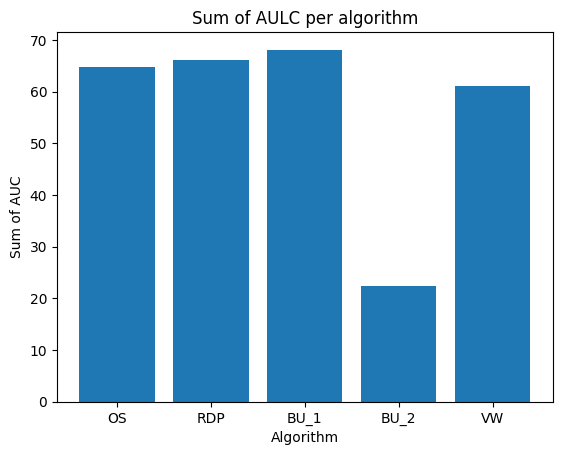

In [8]:
sum_auc = [os_alg_sum_all, rdp_alg_sum_all, bu_alg_sum_all,bu_2_alg_sum_all, vw_alg_sum_all]
plt.bar(['OS', 'RDP', 'BU_1', 'BU_2', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [9]:
os_alg_mean_all = results.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_all = results.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_all = results.query('simp_algorithm == "BU_1"')["performance"].mean()
bu_2_alg_mean_all = results.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_all = results.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AULC per algorithm")
print("OS: ", os_alg_mean_all)
print("RDP: ", rdp_alg_mean_all)
print("BU_1: ", bu_alg_mean_all)
print("BU_2: ", bu_2_alg_mean_all)
print("VW: ", vw_alg_mean_all)

Mean of AULC per algorithm
OS:  0.8870107184611569
RDP:  0.881208515352904
BU_1:  0.9081109056248253
BU_2:  0.7991868624664418
VW:  0.8148492833416755


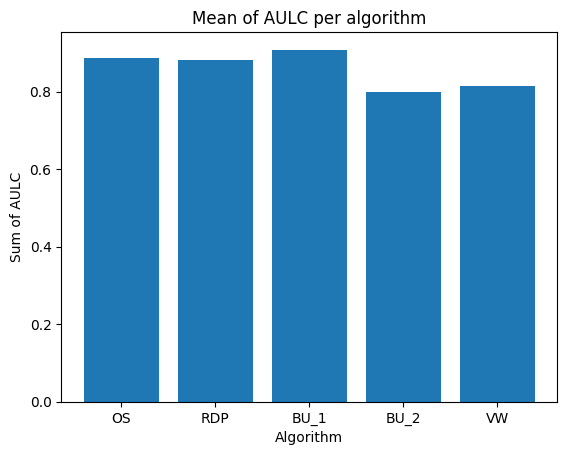

In [10]:
sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, bu_2_alg_mean_all, vw_alg_mean_all]
plt.bar(['OS', 'RDP', 'BU_1','BU_2', 'VW'],sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

#### Mean AULC Per Alg and Model

In [11]:
os_alg_all_per_model = results.query('simp_algorithm == "OS"').groupby("model")["performance"].mean()
rdp_alg_all_per_model = results.query('simp_algorithm == "RDP"').groupby("model")["performance"].mean()
bu_alg_all_per_model = results.query('simp_algorithm == "BU_1"').groupby("model")["performance"].mean()
bu_2_alg_all_per_model = results.query('simp_algorithm == "BU_2"').groupby("model")["performance"].mean()
vw_alg_all_per_model = results.query('simp_algorithm == "VW"').groupby("model")["performance"].mean()
print("Mean of AUC per algorithm and model")
print("OS: ", os_alg_all_per_model)
print("RDP: ", rdp_alg_all_per_model)
print("BU_1: ", bu_alg_all_per_model)
print("BU_2: ", bu_2_alg_all_per_model)
print("VC: ", vw_alg_all_per_model)

Mean of AUC per algorithm and model
OS:  model
cnn                    0.881757
decision-tree          0.890280
knn                    0.890280
logistic-regression    0.890280
Name: performance, dtype: float64
RDP:  model
cnn                    0.870322
decision-tree          0.887694
knn                    0.887694
logistic-regression    0.887694
Name: performance, dtype: float64
BU_1:  model
cnn                    0.896886
decision-tree          0.914798
knn                    0.914798
logistic-regression    0.914798
Name: performance, dtype: float64
BU_2:  model
cnn    0.799187
Name: performance, dtype: float64
VC:  model
cnn                    0.845859
decision-tree          0.796375
knn                    0.796375
logistic-regression    0.796375
Name: performance, dtype: float64


/tmp/ipykernel_22209/973327664.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_22209/973327664.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_22209/973327664.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_22209/973327664.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_22209/973327664.py:23: UserWarning: set_ticklabels(

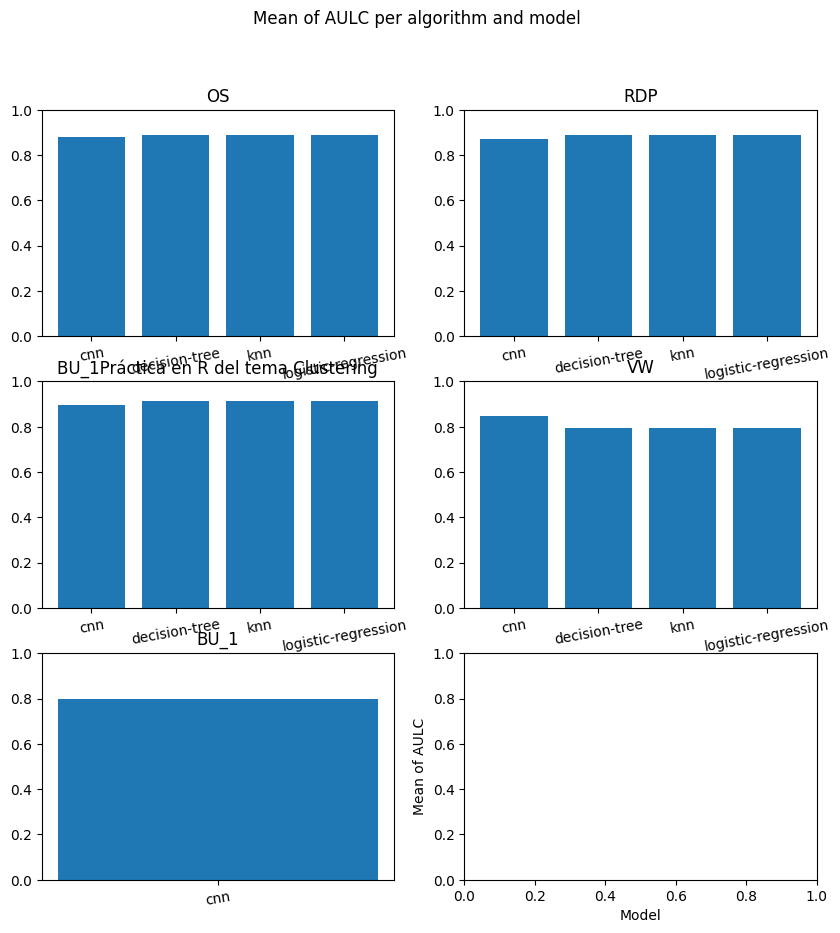

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
ax[0, 0].bar(os_alg_all_per_model.index, os_alg_all_per_model.values)
ax[0, 0].set_title('OS')
ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 0].set_ylim(0, 1)

ax[0, 1].bar(rdp_alg_all_per_model.index, rdp_alg_all_per_model.values)
ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 1].set_title('RDP')
ax[0, 1].set_ylim(0, 1)

ax[1, 0].bar(bu_alg_all_per_model.index, bu_alg_all_per_model.values)
ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[1, 0].set_title('BU_1Práctica en R del tema Clustering')
ax[1, 0].set_ylim(0, 1)

ax[1, 1].bar(vw_alg_all_per_model.index, vw_alg_all_per_model.values)
ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
ax[1, 1].set_title('VW')
ax[1, 1].set_ylim(0, 1)

ax[2, 0].bar(bu_2_alg_all_per_model.index, bu_2_alg_all_per_model.values)
ax[2, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[2, 0].set_title('BU_1')
ax[2, 0].set_ylim(0, 1)

plt.suptitle('Mean of AULC per algorithm and model')
plt.xlabel('Model')
plt.ylabel('Mean of AULC')
plt.show()


## Model Performance

In [13]:
#Perfromance of models
models_mean_perf_train = models_df.groupby("model_type")["train_acc"].mean()
models_mean_perf_train

model_type
cnn                    0.901954
decision-tree          0.649734
knn                    0.999547
logistic-regression    0.546890
Name: train_acc, dtype: float64

#### Train Accuracy

Text(0, 0.5, 'Mean of Train Accuracy')

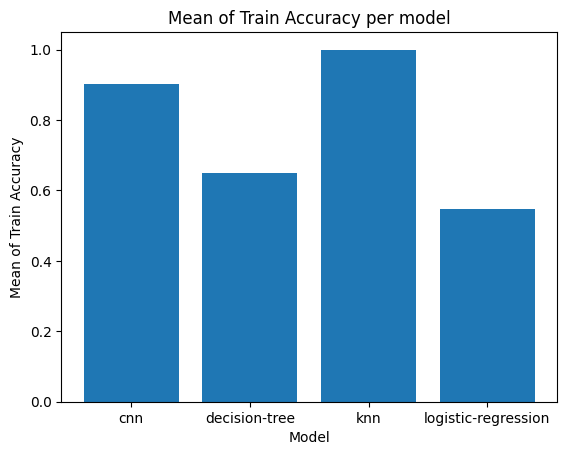

In [14]:
plt.bar(models_mean_perf_train.index, models_mean_perf_train.values) #type: ignore 
plt.title('Mean of Train Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Train Accuracy')

#### Validation Accuracy

In [15]:
models_mean_perf_val = models_df.groupby("model_type")["val_acc"].mean()
models_mean_perf_val

model_type
cnn                    0.724332
decision-tree          0.452748
knn                    0.648964
logistic-regression    0.467873
Name: val_acc, dtype: float64

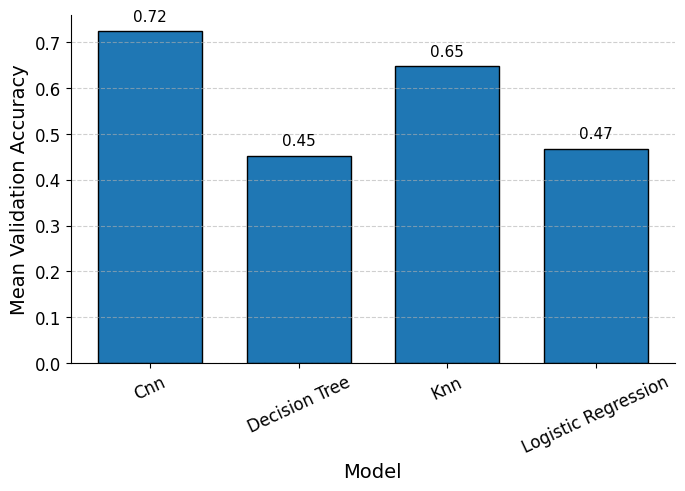

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar([m.replace("-", " ").title() for m in models_mean_perf_val.index], models_mean_perf_val.values, color='C0', edgecolor='black', width=0.7)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Mean Validation Accuracy', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/validation_perf.png")
plt.show()

### By Class

In [17]:
dataset_class = metadata[["dataset", "Class"]].to_dict()
dataset_class_dict = pd.Series(metadata["Class"].values, index=metadata["dataset"].values).to_dict()
print(dataset_class_dict)
#models_df["class"] = models_df["dataset"].map()

{'Adiac': 37, 'BME': 3, 'CBF': 3, 'Chinatown': 2, 'DistalPhalanxOutlineAgeGroup': 3, 'DistalPhalanxOutlineCorrect': 2, 'DistalPhalanxTW': 6, 'ECG200': 2, 'ElectricDevices': 7, 'FacesUCR': 14, 'GunPointAgeSpan': 2, 'GunPointMaleVersusFemale': 2, 'GunPointOldVersusYoung': 2, 'ItalyPowerDemand': 2, 'MedicalImages': 10, 'MiddlePhalanxOutlineAgeGroup': 3, 'MiddlePhalanxOutlineCorrect': 2, 'MiddlePhalanxTW': 6, 'PhalangesOutlinesCorrect': 2, 'ProximalPhalanxOutlineAgeGroup': 3, 'ProximalPhalanxOutlineCorrect': 2, 'ProximalPhalanxTW': 6, 'SmoothSubspace': 3, 'SonyAIBORobotSurface1': 2, 'SwedishLeaf': 15, 'TwoLeadECG': 2, 'TwoPatterns': 4, 'UMD': 3}


In [18]:
models_class_df = models_df
models_class_df["class"] = models_class_df["dataset"].map(dataset_class_dict)
models_class_df

,model_type,train_acc,val_acc,test_acc,dataset,class
0,decision-tree,1.000000,0.583333,0.668966,MiddlePhalanxOutlineCorrect,2.0
1,logistic-regression,0.681462,0.625000,0.593103,MiddlePhalanxOutlineCorrect,2.0
2,cnn,0.940313,0.977188,1.000000,MiddlePhalanxOutlineCorrect,2.0
3,cnn,0.922742,0.964063,1.000000,MiddlePhalanxOutlineCorrect,2.0
4,decision-tree,0.068273,0.016129,0.033333,FaceAll,NaN
...,...,...,...,...,...,...
115,cnn,0.992105,0.994583,0.959732,MedicalImages,10.0
116,decision-tree,0.257576,0.176471,0.278846,TwoPatterns,4.0
117,logistic-regression,0.242424,0.176471,0.288462,TwoPatterns,4.0
118,knn,1.000000,0.411765,0.990385,TwoPatterns,4.0


#### Train Accuracy

In [19]:
models_mean_perf_train_per_class = models_class_df
models_mean_perf_train_per_class = models_mean_perf_train_per_class.groupby(["model_type", "class"])["train_acc"].mean()

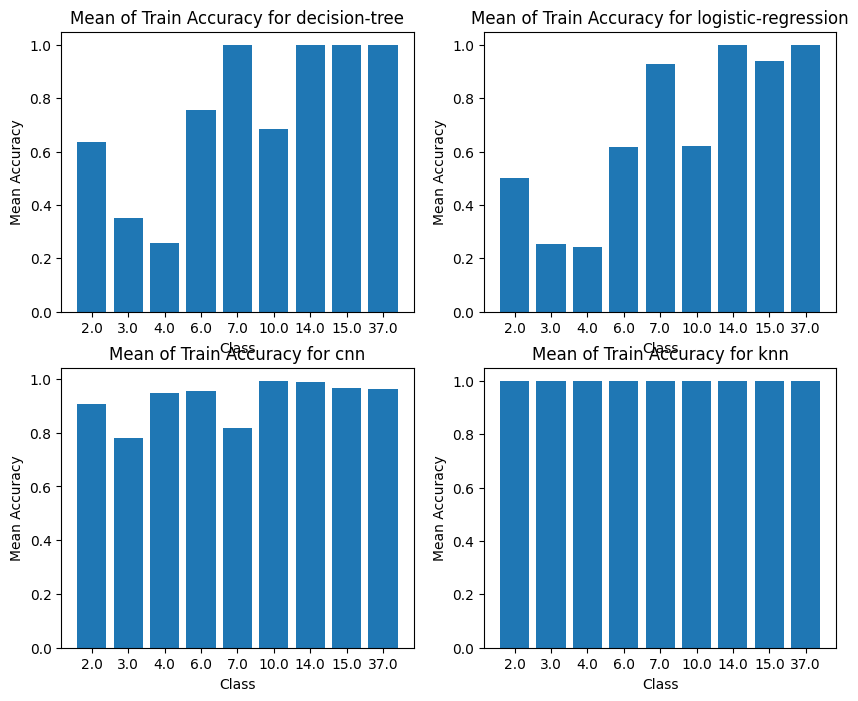

In [20]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_train_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Train Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

#### Validation Accuracy

In [21]:
models_mean_perf_val_per_class = models_class_df
models_mean_perf_val_per_class = models_mean_perf_val_per_class.groupby(["model_type", "class"])["val_acc"].mean()

models_perf_dict = {
    model: models_mean_perf_val_per_class[model]
    for model in models_mean_perf_val_per_class.index.get_level_values(0).unique()
}

/tmp/ipykernel_22209/2199870571.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


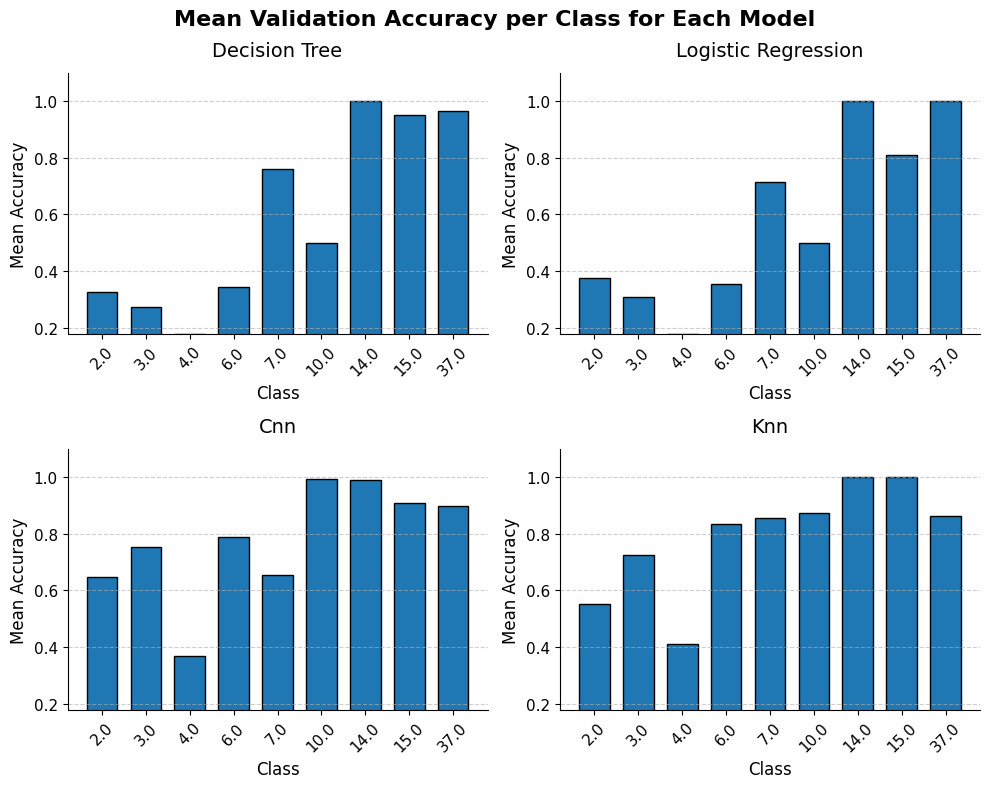

In [22]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1) // 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), constrained_layout=True)

axs = axs.flatten()

y_min = min(np.min(ser.values) for ser in models_perf_dict.values())
y_max = max(np.max(ser.values) for ser in models_perf_dict.values())

for i, model in enumerate(models):
    model_data = models_mean_perf_val_per_class[model]    
    x_values = [str(val) for val in model_data.index.tolist()]
    y_values = model_data.values.tolist()
    
    ax = axs[i]
    bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)
    ax.set_title(f'{model.replace("-", " ").title()}', fontsize=14, pad=12)
    ax.set_xlabel('Class', fontsize=12)
    ax.set_ylabel('Mean Accuracy', fontsize=12)
    ax.set_ylim(y_min, y_max * 1.10)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Mean Validation Accuracy per Class for Each Model', fontsize=16, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.90)  
plt.show()


## Only for CNN

In [23]:
results_cnn = results.query('model == "cnn"')
results_cnn.loc[:,'comp@loy=0.8'] = results_cnn['comp@loy=0.8'].astype(float)
results_cnn.loc[:,'num_segm@loy=0.8'] = results_cnn['num_segm@loy=0.8'].astype(float)
print(results_cnn)

       dataset model simp_algorithm  performance comp@loy=0.8  \
0        Adiac   cnn             OS     0.917075     0.090356   
1        Adiac   cnn            RDP     0.829347     0.094456   
2        Adiac   cnn             VW     0.870908     0.106135   
3        Adiac   cnn           BU_1     0.822399     0.089519   
4        Adiac   cnn           BU_2     0.763462     0.173325   
..         ...   ...            ...          ...          ...   
371        UMD   cnn           BU_1     0.935916     0.045008   
372        UMD   cnn           BU_2     0.895266     0.083305   
373  Chinatown   cnn             OS     0.758471     0.309228   
374  Chinatown   cnn            RDP     0.649788     0.430704   
375  Chinatown   cnn             VW     0.671196      0.40705   

     num_segm@loy=0.8      time  
0           20.734278  0.000000  
1            2.060606  0.000000  
2            8.733547  0.000000  
3            4.987528  0.000000  
4            8.106370  0.000000  
..             

#### Sum AULC

In [24]:
os_alg_sum_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_cnn = results_cnn.query('simp_algorithm == "BU_1"')["performance"].sum()
bu_2_alg_sum_cnn = results_cnn.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_cnn)
print("RDP: ", rdp_alg_sum_cnn)
print("BU_1: ", bu_alg_sum_cnn)
print("BU_2: ", bu_2_alg_sum_cnn)
print("VW: ", vw_alg_sum_cnn)

Sum of AULC per algorithm
OS:  24.68919467851672
RDP:  24.36902773154503
BU_1:  25.11279872596661
BU_2:  22.37723214906037
VW:  23.68405673512767


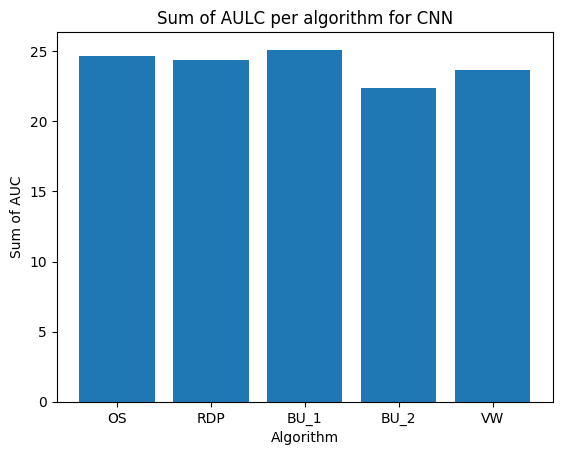

In [25]:
sum_auc = [os_alg_sum_cnn, rdp_alg_sum_cnn, bu_alg_sum_cnn, bu_2_alg_sum_cnn, vw_alg_sum_cnn]
plt.bar(['OS', 'RDP', 'BU_1', 'BU_2', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm for CNN')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [26]:
os_alg_mean_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_cnn = results_cnn.query('simp_algorithm == "BU_1"')["performance"].mean()
bu_2_alg_mean_cnn = results_cnn.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AUC per algorithm")
print("OS: ", os_alg_mean_cnn)
print("RDP: ", rdp_alg_mean_cnn)
print("BU_1: ", bu_alg_mean_cnn)
print("BU_2: ", bu_2_alg_mean_cnn)
print("VW: ", vw_alg_mean_cnn)

Mean of AUC per algorithm
OS:  0.8817569528041685
RDP:  0.8703224189837512
BU_1:  0.8968856687845218
BU_2:  0.7991868624664418
VW:  0.8458591691117024


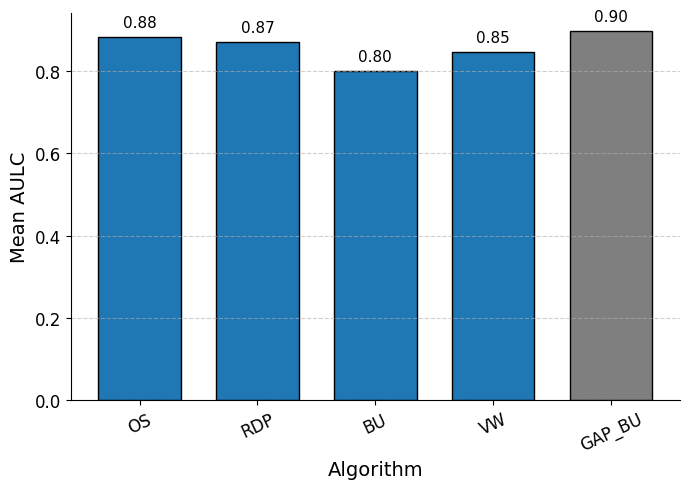

In [27]:
mean_auc_cnn = [os_alg_mean_cnn, rdp_alg_mean_cnn, bu_2_alg_mean_cnn, vw_alg_mean_cnn, bu_alg_mean_cnn]
alg_labels = ['OS', 'RDP', 'BU', 'VW', 'GAP_BU']

bar_colors = ['C0', 'C0', 'C0', 'C0', 'C7']  

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    alg_labels,
    mean_auc_cnn,
    color=bar_colors,
    edgecolor='black',
    width=0.7,
)

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Mean AULC', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/mean_auc_cnn.png")  
plt.show()

By Loyalty Threshold

In [28]:
os_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "OS"')["comp@loy=0.8"], dtype=np.float64).mean()
rdp_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "RDP"')["comp@loy=0.8"], dtype=np.float64).mean()
bu_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "BU_1"')["comp@loy=0.8"], dtype=np.float64).mean()
bu_2_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "BU_2"')["comp@loy=0.8"], dtype=np.float64).mean()
vw_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "VW"')["comp@loy=0.8"], dtype=np.float64).mean()
print("Mean Complexity at Loyalty 0.8 per algorithm")
print("OS: ", os_alg_mean_cnn_comp)
print("RDP: ", rdp_alg_mean_cnn_comp)
print("BU_1: ", bu_alg_mean_cnn_comp)
print("BU_2: ", bu_2_alg_mean_cnn_comp)
print("VW: ", vw_alg_mean_cnn_comp)

Mean Complexity at Loyalty 0.8 per algorithm
OS:  0.1794357650895131
RDP:  0.19429918285469902
BU_1:  0.2328674110591819
BU_2:  0.3435573292661404
VW:  0.3805534570842365


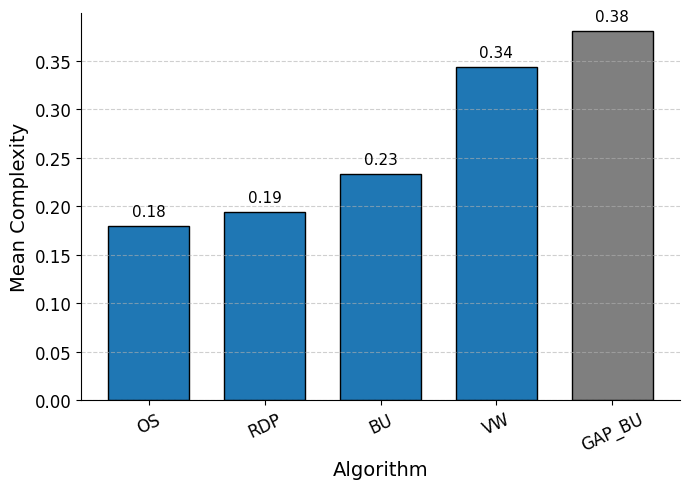

In [29]:
mean_comp_cnn = [os_alg_mean_cnn_comp, rdp_alg_mean_cnn_comp, bu_alg_mean_cnn_comp, bu_2_alg_mean_cnn_comp,vw_alg_mean_cnn_comp]
alg_labels = ['OS', 'RDP', 'BU', 'VW', 'GAP_BU']

bar_colors = ['C0', 'C0', 'C0', 'C0', 'C7']  

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    alg_labels,
    mean_comp_cnn,
    color=bar_colors,
    edgecolor='black',
    width=0.7,
)

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Mean Complexity', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

In [30]:
os_alg_mean_cnn_num_seg = np.array(results_cnn.query('simp_algorithm == "OS"')["num_segm@loy=0.8"], dtype=np.float64).mean()
rdp_alg_mean_cnn_num_seg = np.array(results_cnn.query('simp_algorithm == "RDP"')["num_segm@loy=0.8"], dtype=np.float64).mean()
bu_alg_mean_cnn_num_seg = np.array(results_cnn.query('simp_algorithm == "BU_1"')["num_segm@loy=0.8"], dtype=np.float64).mean()
bu_2_alg_mean_cnn_num_seg = np.array(results_cnn.query('simp_algorithm == "BU_2"')["num_segm@loy=0.8"], dtype=np.float64).mean()
vw_alg_mean_cnn_num_seg = np.array(results_cnn.query('simp_algorithm == "VW"')["num_segm@loy=0.8"], dtype=np.float64).mean()
print("Mean Number Segments at Loyalty 0.8 per algorithm")
print("OS: ", os_alg_mean_cnn_num_seg)
print("RDP: ", rdp_alg_mean_cnn_num_seg)
print("BU_1: ", bu_alg_mean_cnn_num_seg)
print("BU_2: ", bu_2_alg_mean_cnn_num_seg)
print("VW: ", vw_alg_mean_cnn_num_seg)

Mean Number Segments at Loyalty 0.8 per algorithm
OS:  nan
RDP:  nan
BU_1:  3.3136195389665053
BU_2:  5.126061485683991
VW:  nan


### By Class:

In [31]:
results_cnn_class = results_cnn
results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)
#print(results_cnn_class.head(5))

/tmp/ipykernel_22209/3098996261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)


#### AULC Per Alg and Class

In [32]:
results_cnn_alg_class = results_cnn_class.groupby(["simp_algorithm", "class"])["class"].count()
#print(results_cnn_alg_class)

In [33]:
results_cnn_alg_class_mean = results_cnn_class.groupby(["simp_algorithm", "class"])["performance"].mean()
#print(results_cnn_alg_class_mean)
results_cnn_alg_class_std = results_cnn_class.groupby(["simp_algorithm", "class"])["performance"].std()
#print(results_cnn_alg_class_std)


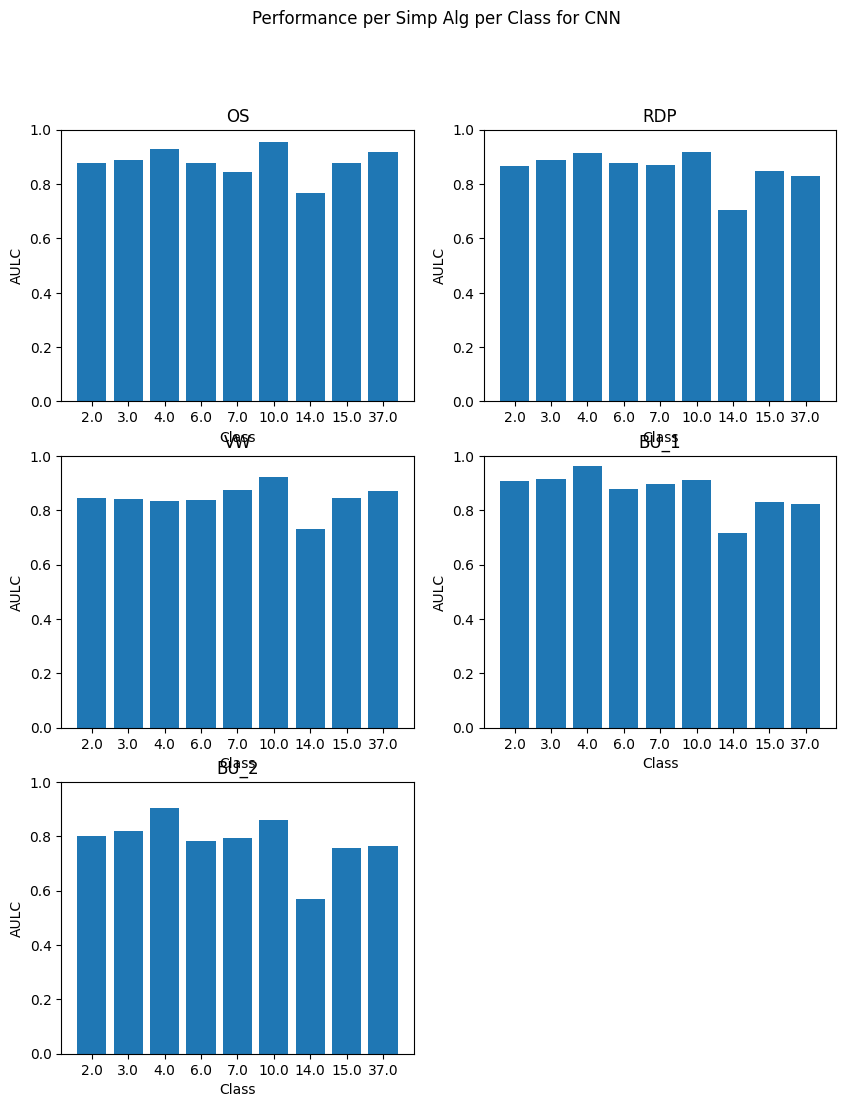

In [34]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_class_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Class')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for CNN")
plt.show()

Binary vs Multicalss

In [35]:
results_cnn_class["class_type"] = results_cnn_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")
results_cnn_alg_bin_vs_mc_mean = results_cnn_class.groupby(["simp_algorithm", "class_type"])["performance"].mean()
print(results_cnn_alg_bin_vs_mc_mean)

simp_algorithm  class_type
BU_1            binary        0.908579
                multiclass    0.889320
BU_2            binary        0.799419
                multiclass    0.799037
OS              binary        0.875793
                multiclass    0.885616
RDP             binary        0.864725
                multiclass    0.873944
VW              binary        0.845486
                multiclass    0.846100
Name: performance, dtype: float64


/tmp/ipykernel_22209/705144334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_class["class_type"] = results_cnn_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")


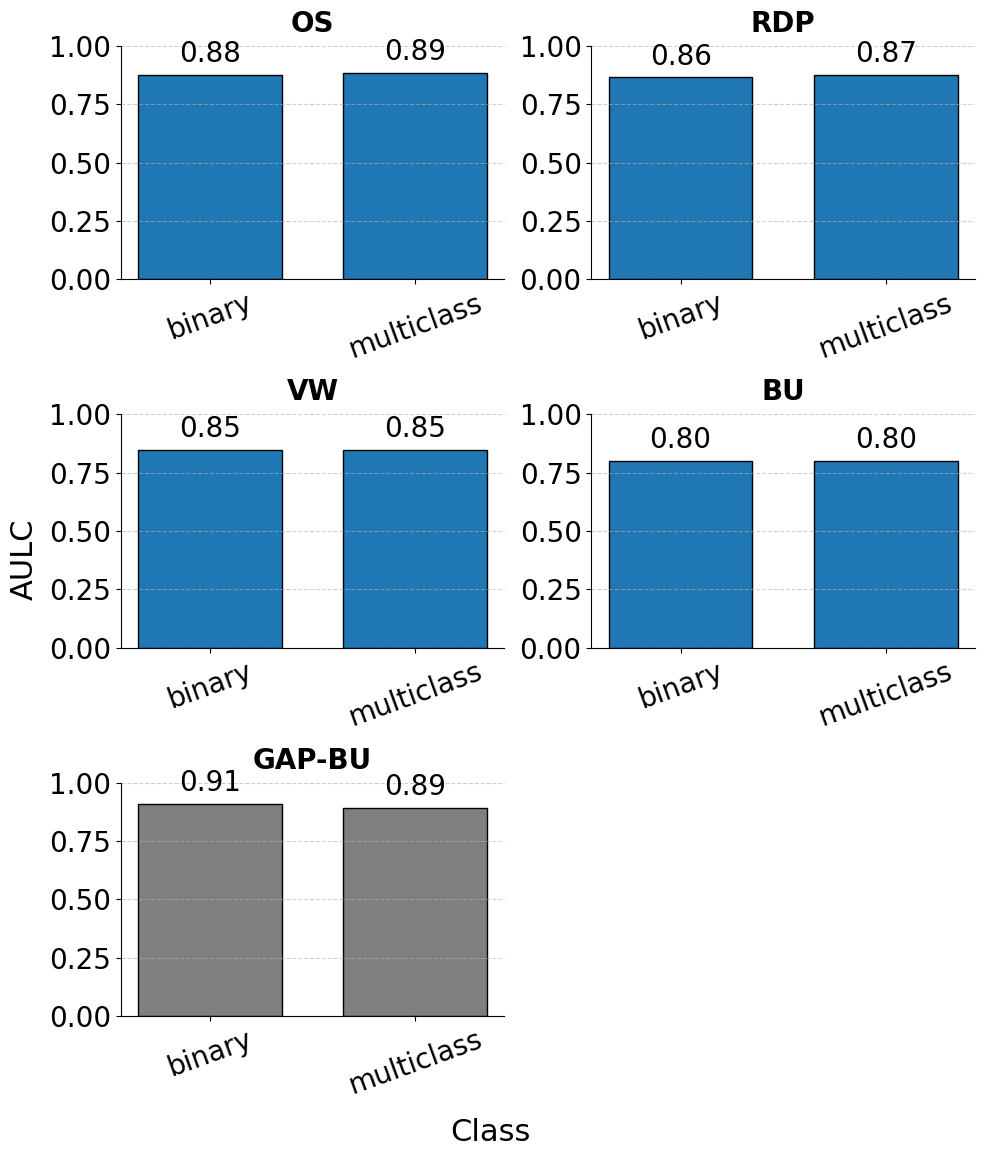

In [36]:

fontsize = 20
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_bin_vs_mc_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    # Set pretty names
    plot_alg = alg
    if alg == 'BU_2':
        plot_alg = 'BU'
    elif alg == 'BU_1':
        plot_alg = 'GAP-BU'

    ax.set_title(f'{plot_alg.upper()}', fontsize=fontsize, fontweight='bold', pad=10)
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=20, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}", 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=fontsize
        )

# Add common x and y labels to the entire figure
fig.supxlabel('Class', fontsize=fontsize+2)
fig.supylabel('AULC', fontsize=fontsize+2)
# Optionally, add a common title as well:
# fig.suptitle("Performance per Simplification Algorithm per Class for CNN", fontsize=fontsize+4, weight='bold', y=1.01)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # provide space for supxlabel/supylabel (tweak as needed)
plt.savefig("../plots/mean_auc_per_class_cnn.png")
plt.show()

By Loyalty Threshold

In [37]:
results_cnn_alg_bin_vs_mc_mean_comp = (results_cnn_class.groupby(["simp_algorithm", "class_type"])["comp@loy=0.8"]).mean()
print(results_cnn_alg_bin_vs_mc_mean_comp)

simp_algorithm  class_type
BU_1            binary        0.339757
                multiclass    0.163704
BU_2            binary        0.464914
                multiclass    0.265032
OS              binary         0.20936
                multiclass    0.160073
RDP             binary        0.235001
                multiclass    0.167963
VW              binary        0.435992
                multiclass    0.344682
Name: comp@loy=0.8, dtype: object


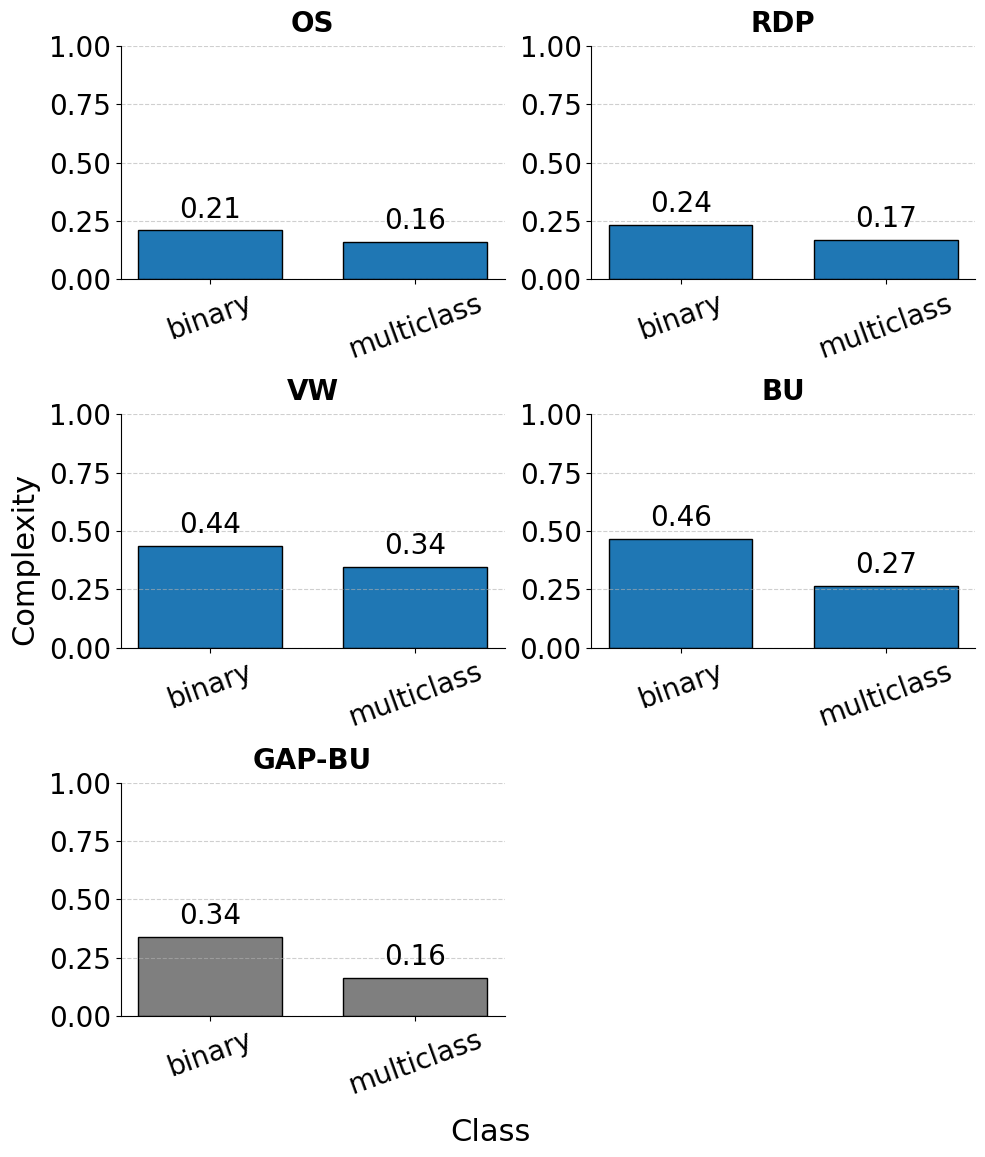

In [38]:

fontsize = 20
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_bin_vs_mc_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    # Set pretty names
    plot_alg = alg
    if alg == 'BU_2':
        plot_alg = 'BU'
    elif alg == 'BU_1':
        plot_alg = 'GAP-BU'

    ax.set_title(f'{plot_alg.upper()}', fontsize=fontsize, fontweight='bold', pad=10)
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=20, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}", 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=fontsize
        )

# Add common x and y labels to the entire figure
fig.supxlabel('Class', fontsize=fontsize+2)
fig.supylabel('Complexity', fontsize=fontsize+2)
# Optionally, add a common title as well:
# fig.suptitle("Performance per Simplification Algorithm per Class for CNN", fontsize=fontsize+4, weight='bold', y=1.01)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # provide space for supxlabel/supylabel (tweak as needed)
plt.savefig("../plots/mean_auc_per_class_cnn.png")
plt.show()

### By length

In [39]:
dataset_lendth = metadata[["dataset", "Length"]].to_dict()
dataset_length_dict = pd.Series(metadata["Length"].values, index=metadata["dataset"].values).to_dict()
#print(dataset_length_dict)
#models_df["class"] = models_df["dataset"].map()

In [40]:
results_cnn_length = results_cnn
results_cnn_length["length"] = results_cnn_length["dataset"].map(dataset_length_dict).copy()
#print(results_cnn_length.head(5))

/tmp/ipykernel_22209/2137824416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_length["length"] = results_cnn_length["dataset"].map(dataset_length_dict).copy()


In [41]:
results_cnn_alg_length_mean = results_cnn_length.groupby(["simp_algorithm", "length"])["performance"].mean()

print(results_cnn_alg_length_mean)

simp_algorithm  length
BU_1            15.0      0.955950
                24.0      0.870736
                70.0      0.726763
                80.0      0.897792
                82.0      0.923755
                96.0      0.907509
                99.0      0.909927
                128.0     0.919050
                131.0     0.716769
                150.0     0.972250
                176.0     0.822399
BU_2            15.0      0.730320
                24.0      0.669314
                70.0      0.526628
                80.0      0.800254
                82.0      0.864104
                96.0      0.815651
                99.0      0.861121
                128.0     0.853617
                131.0     0.568226
                150.0     0.942356
                176.0     0.763462
OS              15.0      0.821505
                24.0      0.746973
                70.0      0.736420
                80.0      0.887926
                82.0      0.935941
                96.0      0.8617

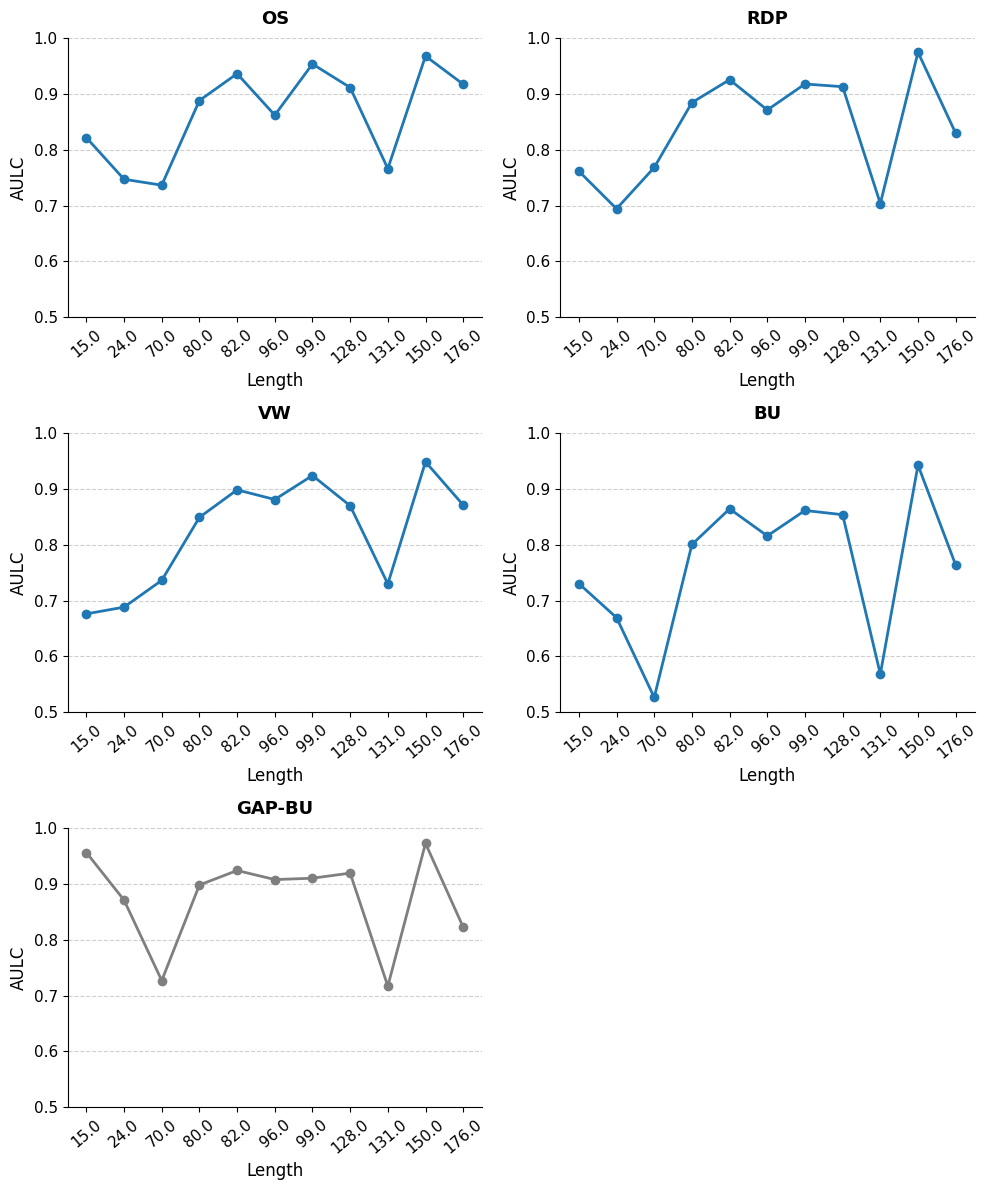

In [42]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_length_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        ax.plot(x_values, y_values, marker='o', color='C7', linewidth=2)
    else:
        ax.plot(x_values, y_values, marker='o', color='C0', linewidth=2)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Length', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.5, 1.0)
    
    
    ax.tick_params(axis='x', rotation=40, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #for x, y in zip(x_values, y_values):
    #    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),ha='center', fontsize=10)

#fig.suptitle("Performance per Simplification Algorithm per Length for CNN", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig("../plots/mean_auc_length_cnn.png")
plt.show()

By Loyalty Threshold

In [43]:
results_cnn_alg_length_mean_comp = results_cnn_length.groupby(["simp_algorithm", "length"])["comp@loy=0.8"].mean()

print(results_cnn_alg_length_mean_comp)

simp_algorithm  length
BU_1            15.0      0.269749
                24.0      0.296563
                70.0      0.260657
                80.0      0.297974
                82.0      0.097696
                96.0      0.142223
                99.0      0.054859
                128.0     0.088478
                131.0     0.378085
                150.0      0.35509
                176.0     0.089519
BU_2            15.0      0.457595
                24.0      0.546735
                70.0      0.506726
                80.0      0.403392
                82.0      0.183047
                96.0      0.273686
                99.0      0.099513
                128.0     0.169074
                131.0     0.551777
                150.0     0.372373
                176.0     0.173325
OS              15.0      0.344981
                24.0      0.316771
                70.0      0.286619
                80.0      0.229141
                82.0      0.079422
                96.0      0.1609

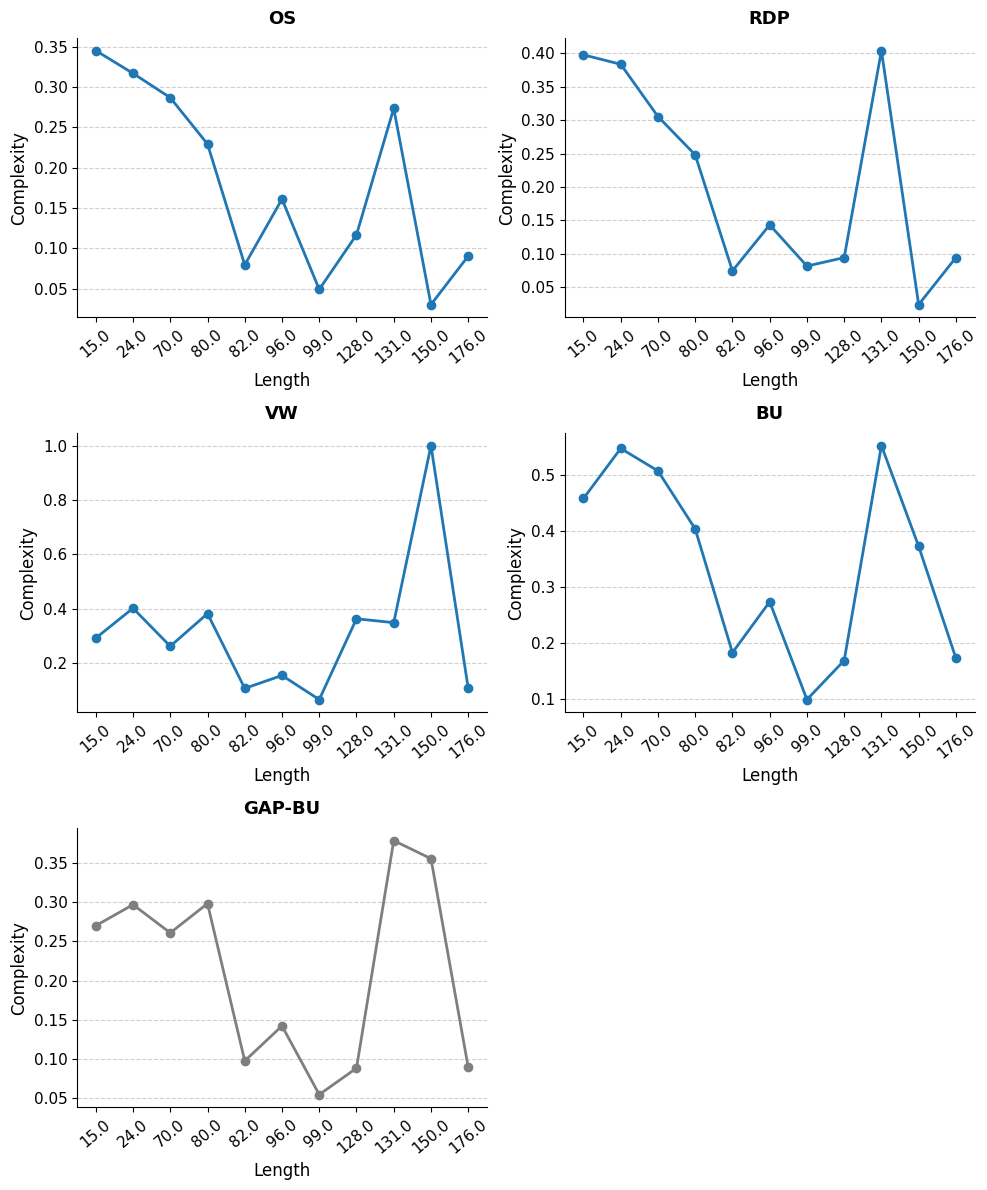

In [44]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_length_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        ax.plot(x_values, y_values, marker='o', color='C7', linewidth=2)
    else:
        ax.plot(x_values, y_values, marker='o', color='C0', linewidth=2)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Length', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    #ax.set_ylim(0.5, 1.0)
    
    
    ax.tick_params(axis='x', rotation=40, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #for x, y in zip(x_values, y_values):
    #    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),ha='center', fontsize=10)

#fig.suptitle("Performance per Simplification Algorithm per Length for CNN", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

### By Stationarity

In [45]:
dataset_stat = metadata[["dataset", "Stationary"]].to_dict()
dataset_stat_dict = pd.Series(metadata["Stationary"].values, index=metadata["dataset"].values).to_dict()
results_cnn_stat = results_cnn
results_cnn_stat["stationary"] = results_cnn_stat["dataset"].map(dataset_stat_dict).copy()

results_cnn_alg_stat_mean = results_cnn_stat.groupby(["simp_algorithm", "stationary"])["performance"].mean()

/tmp/ipykernel_22209/961333341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_stat["stationary"] = results_cnn_stat["dataset"].map(dataset_stat_dict).copy()


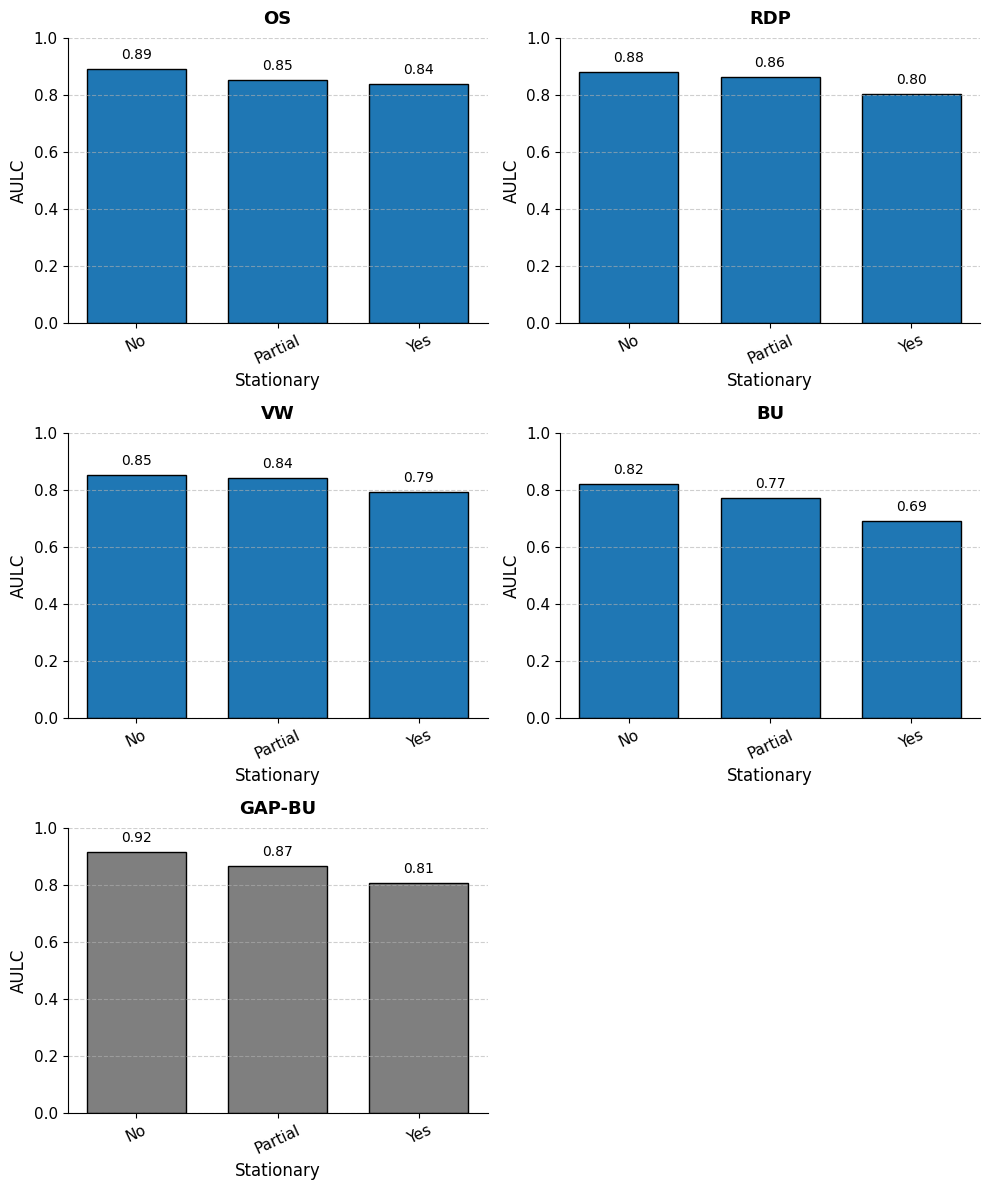

In [46]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_stat_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' else 'No' if x.lower() == 'false' else x for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Stationary', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_stationary_cnn.png")
plt.show()

By Loyalty Threshold

In [47]:
results_cnn_alg_stat_mean_comp = results_cnn_stat.groupby(["simp_algorithm", "stationary"])["comp@loy=0.8"].mean()

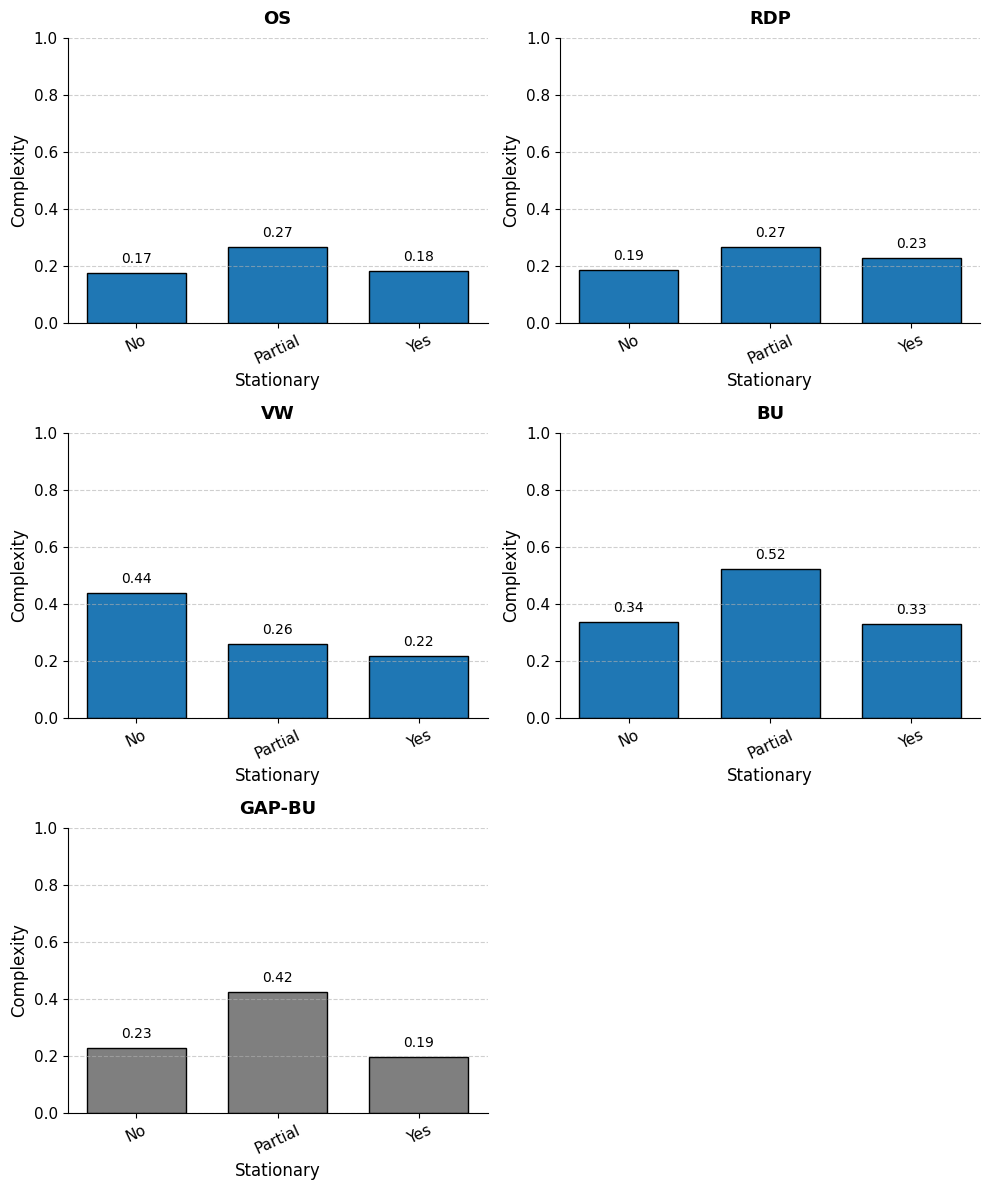

In [48]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_stat_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' else 'No' if x.lower() == 'false' else x for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Stationary', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_stationary_cnn.png")
plt.show()

### By Seasonality

In [49]:
dataset_season = metadata[["dataset", "Seasonal"]].to_dict()
dataset_season_dict = pd.Series(metadata["Seasonal"].values, index=metadata["dataset"].values).to_dict()
results_cnn_season = results_cnn
results_cnn_season["seasonal"] = results_cnn_season["dataset"].map(dataset_season_dict).copy()

results_cnn_alg_season_mean = results_cnn_season.groupby(["simp_algorithm", "seasonal"])["performance"].mean()

/tmp/ipykernel_22209/36910846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_season["seasonal"] = results_cnn_season["dataset"].map(dataset_season_dict).copy()


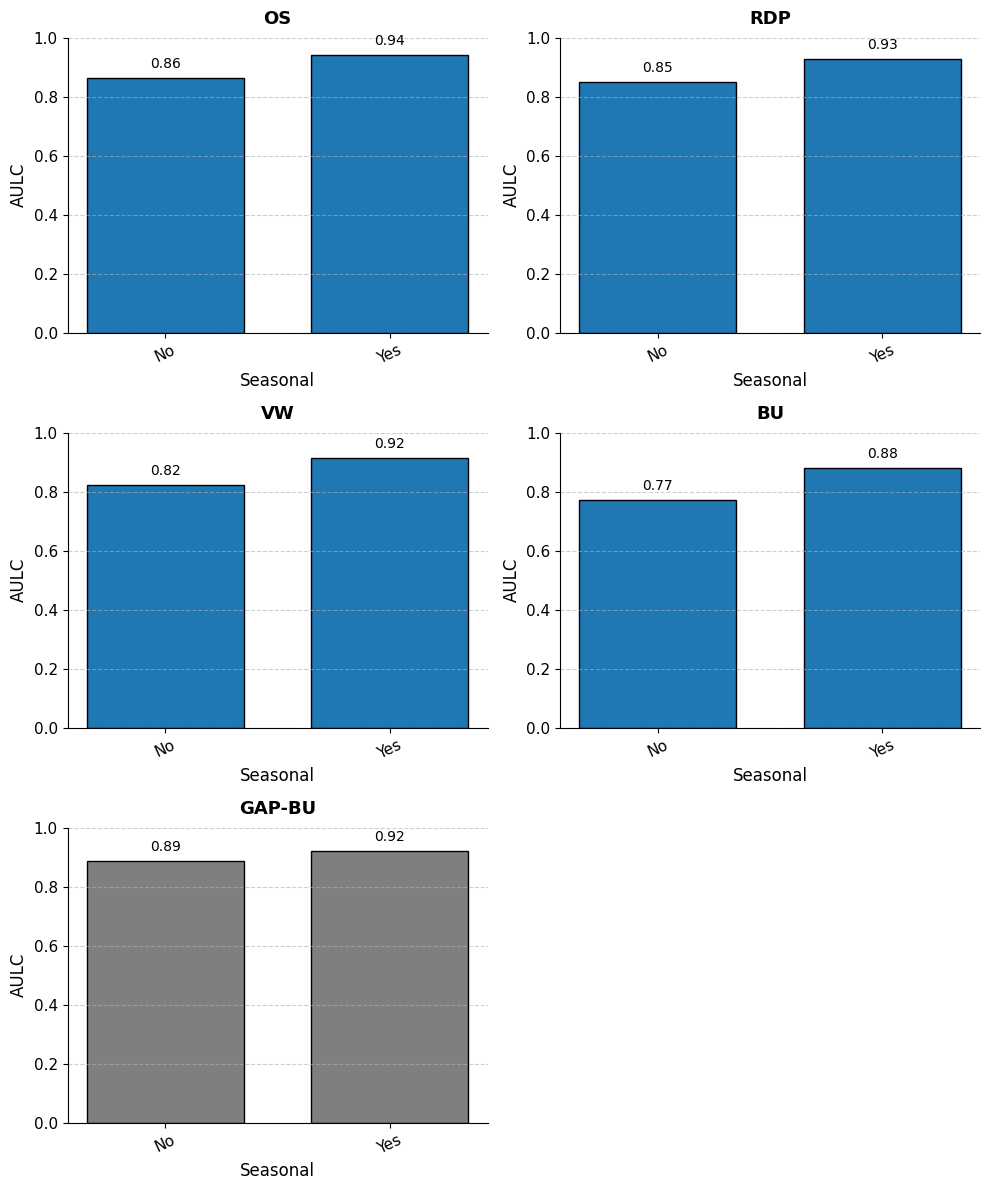

In [50]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_season_mean[alg]
    
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' 
                else 'No' if x.lower() == 'false' 
                else x.title() for x in x_values]

    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Seasonal', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../plots/mean_auc_seasonality_cnn.png")
plt.show()


By Loyalty Threshold

In [51]:
results_cnn_alg_season_mean_comp = results_cnn_season.groupby(["simp_algorithm", "seasonal"])["comp@loy=0.8"].mean()

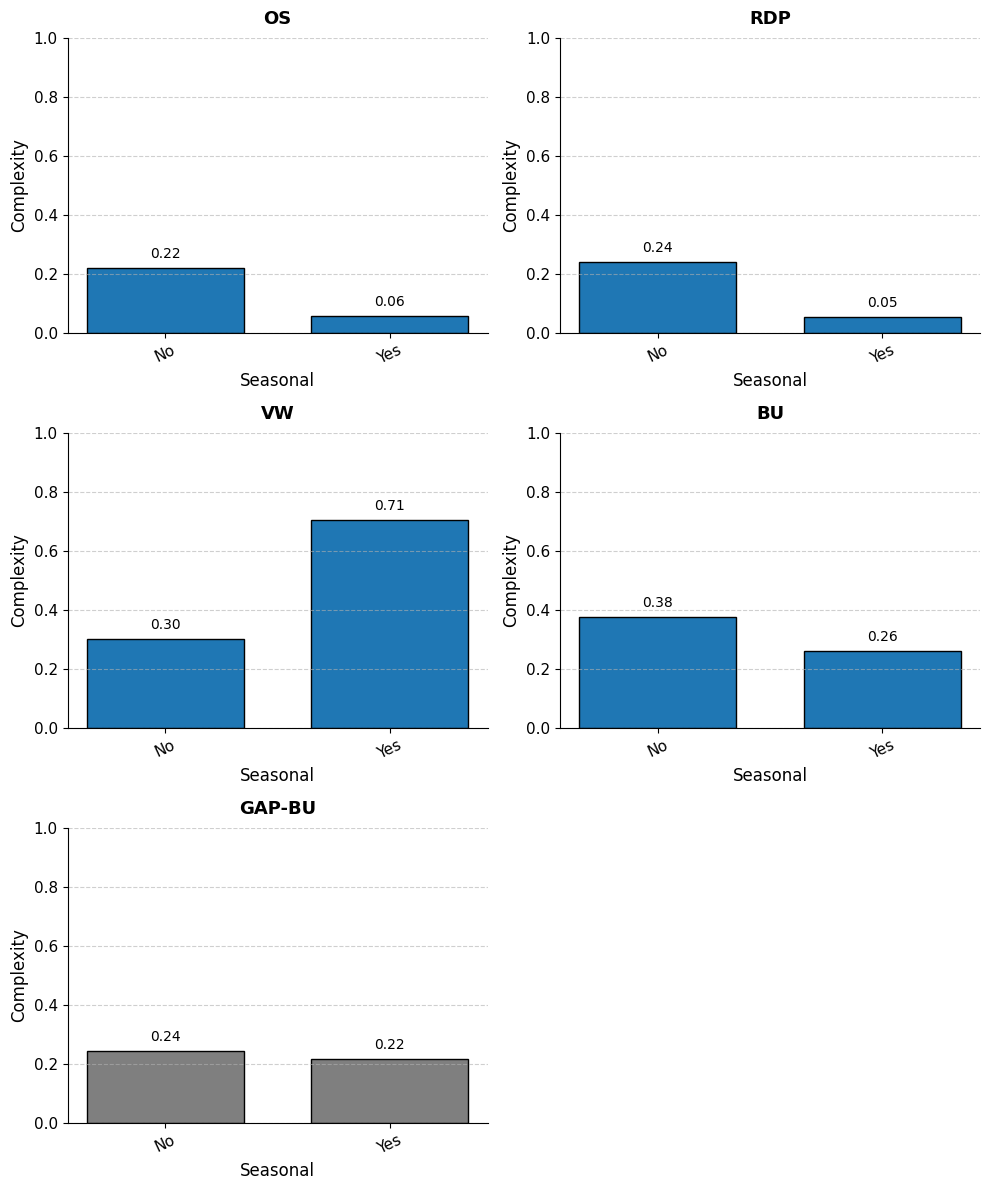

In [52]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_season_mean_comp[alg]
    
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' 
                else 'No' if x.lower() == 'false' 
                else x.title() for x in x_values]

    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Seasonal', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../plots/mean_auc_seasonality_cnn.png")
plt.show()


### By Entropy

In [ ]:
metadata["Entropy_bins"] = pd.qcut(metadata["Entropy"], q=3, labels=[0,1,2], retbins=True)

In [65]:
_, bins = pd.qcut(metadata["Entropy"], q=3, labels=[0,1,2], retbins=True)
print(bins)

[0.04079289 0.23381681 0.27187529 0.82591962]


In [54]:
metadata.query("Entropy_bins == 0")

,ID,Type,dataset,Train,Test,Class,Length,ED (w=0),DTW (learned_w),DTW (w=100),Default rate,Stationary,Seasonal,Entropy,Entropy_bins
1,90,Simulated,BME,30,150,3,128,0.1667,0.0200 (4),0.1000,0.6667,False,True,0.116147,0
10,107,Motion,GunPointAgeSpan,135,316,2,150,0.1013,0.0348 (3),0.0823,0.4937,False,True,0.126225,0
11,108,Motion,GunPointMaleVersusFemale,135,316,2,150,0.0253,0.0253 (0),0.0032,0.4747,False,True,0.124931,0
12,109,Motion,GunPointOldVersusYoung,136,315,2,150,0.0476,0.0349 (4),0.1619,0.4762,False,True,0.121894,0
14,44,Image,MedicalImages,381,760,10,99,0.3158,0.2526 (20),0.2632,0.4855,False,False,0.175250,0
15,45,Image,MiddlePhalanxOutlineAgeGroup,400,154,3,80,0.4805,0.4805 (0),0.5000,0.4286,False,False,0.233817,0
20,57,Image,ProximalPhalanxOutlineCorrect,600,291,2,80,0.1924,0.2096 (1),0.2165,0.3162,False,False,0.228385,0
21,58,Image,ProximalPhalanxTW,400,205,6,80,0.2927,0.2439 (2),0.2439,0.6488,False,False,0.227575,0
22,127,Simulated,SmoothSubspace,150,150,3,15,0.0933,0.0533 (1),0.1733,0.6667,False,False,0.040793,0
27,128,Simulated,UMD,36,144,3,150,0.2361,0.0278 (6),0.0069,0.6667,False,True,0.115110,0


In [55]:
dataset_entropy = metadata[["dataset", "Entropy_bins"]].to_dict()
dataset_entropy_dict = pd.Series(metadata["Entropy_bins"].values, index=metadata["dataset"].values).to_dict()
results_cnn_entropy = results_cnn
results_cnn_entropy["entropy"] = results_cnn_entropy["dataset"].map(dataset_entropy_dict).copy()

results_cnn_alg_entropy_mean = results_cnn_entropy.groupby(["simp_algorithm", "entropy"])["performance"].mean()

/tmp/ipykernel_22209/4068135905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_entropy["entropy"] = results_cnn_entropy["dataset"].map(dataset_entropy_dict).copy()


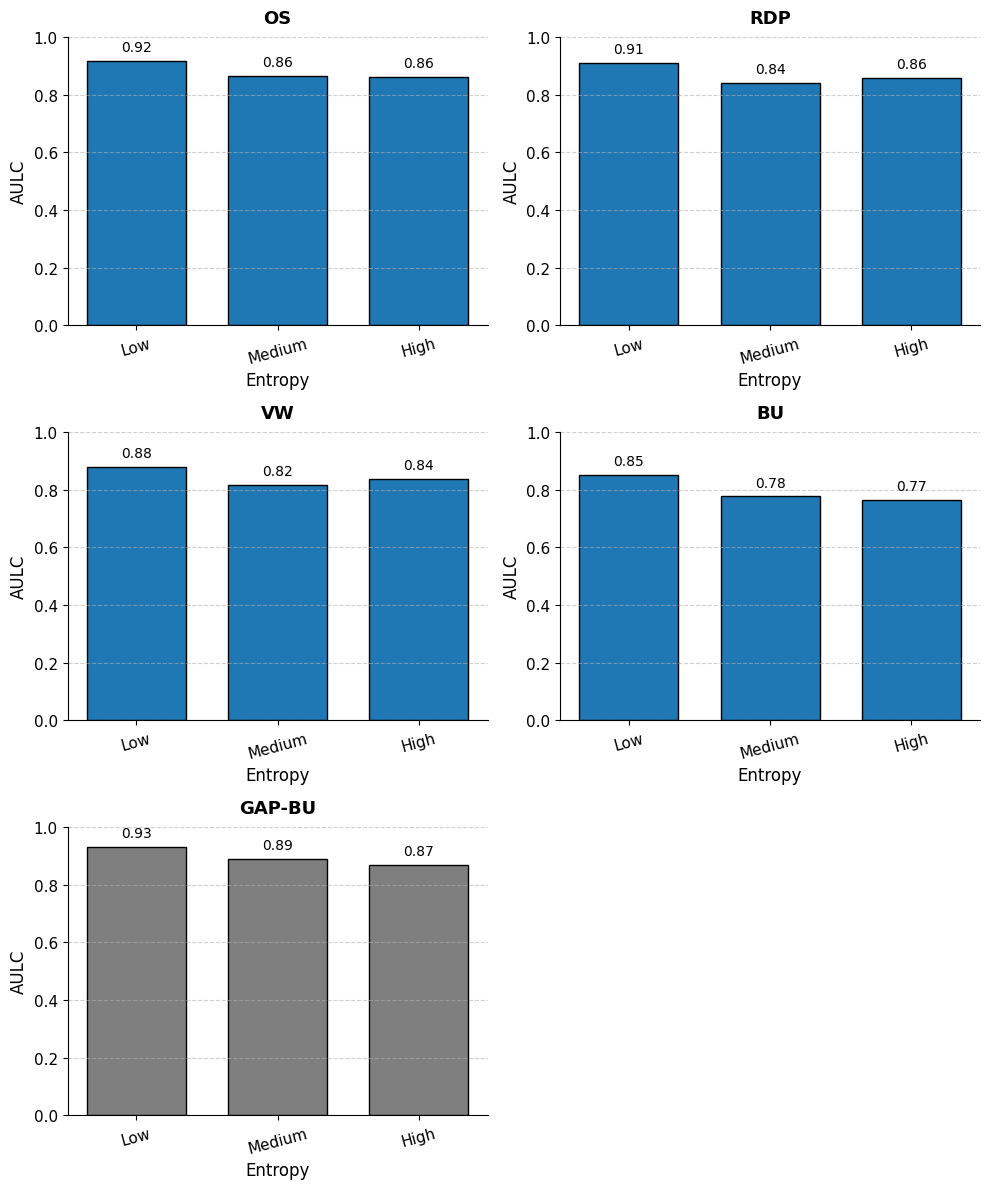

In [56]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

entropy_labels = ["Low", "Medium", "High"]

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_entropy_mean[alg]
    x_values = list(simp_alg_data.index)
    tick_positions = [int(x) for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(tick_positions, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(tick_positions, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Entropy', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(entropy_labels)
    ax.tick_params(axis='x', labelsize=11, rotation=15)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_entropy_cnn.png")
plt.show()


By Loyalty Threshold

In [57]:
results_cnn_alg_entropy_mean_comp = results_cnn_entropy.groupby(["simp_algorithm", "entropy"])["comp@loy=0.8"].mean()

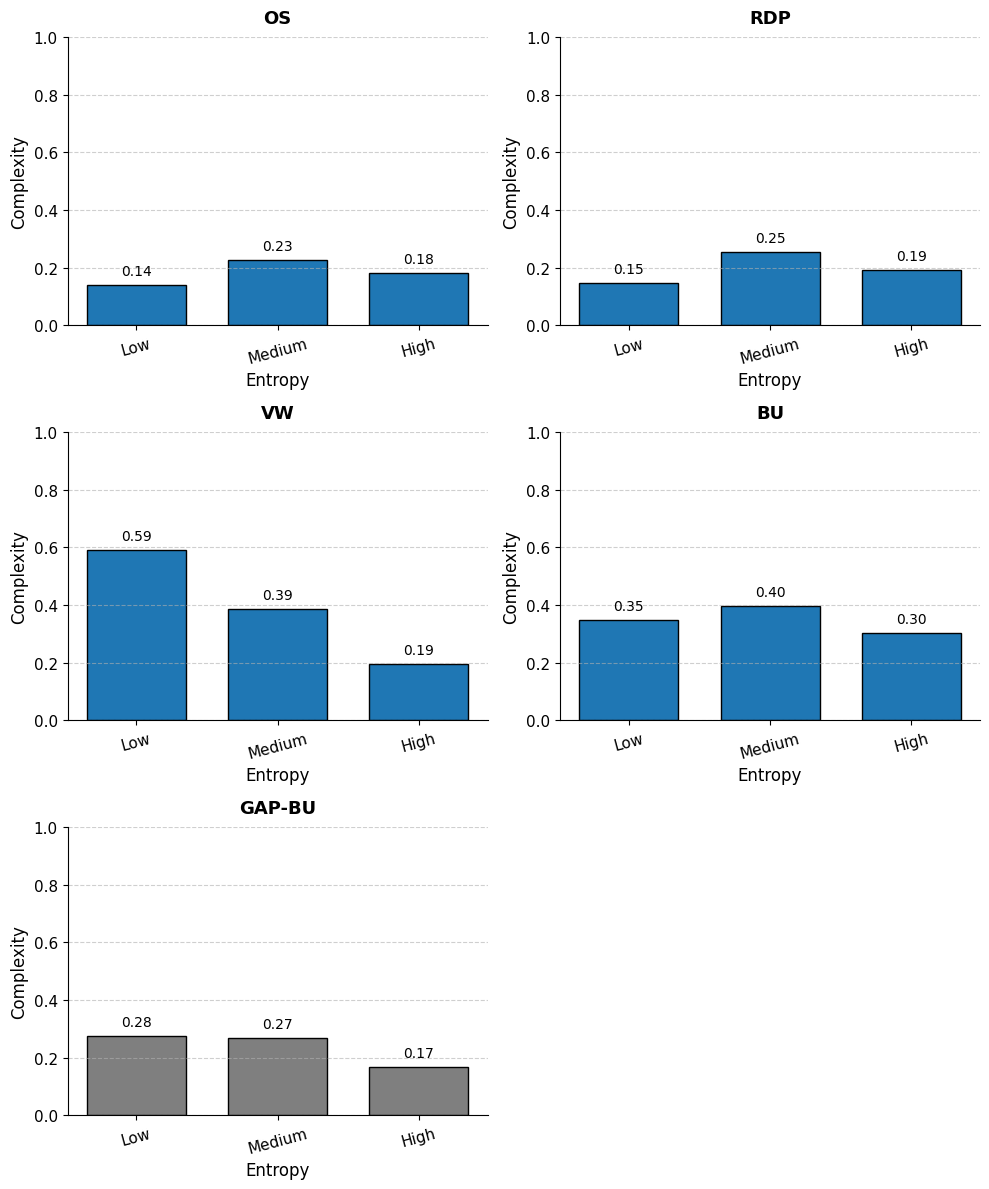

In [58]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

entropy_labels = ["Low", "Medium", "High"]

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_entropy_mean_comp[alg]
    x_values = list(simp_alg_data.index)
    tick_positions = [int(x) for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(tick_positions, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(tick_positions, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Entropy', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(entropy_labels)
    ax.tick_params(axis='x', labelsize=11, rotation=15)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_entropy_cnn.png")
plt.show()


### Combined Properties

In [59]:
results_cnn_best_case = results_cnn.query(f"stationary == 'False' & seasonal == True & entropy == 0")
results_cnn_best_case

,dataset,model,simp_algorithm,performance,comp@loy=0.8,num_segm@loy=0.8,time,class,class_type,length,stationary,seasonal,entropy
15,BME,cnn,OS,0.959401,0.046598,6.835864,0.0,3.0,multiclass,128.0,False,True,0.0
16,BME,cnn,RDP,0.972483,0.017197,1.810000,0.0,3.0,multiclass,128.0,False,True,0.0
17,BME,cnn,VW,0.931545,1.0,1.000000,0.0,3.0,multiclass,128.0,False,True,0.0
18,BME,cnn,BU_1,0.965030,0.045526,3.319200,0.0,3.0,multiclass,128.0,False,True,0.0
19,BME,cnn,BU_2,0.931683,0.083177,5.038400,0.0,3.0,multiclass,128.0,False,True,0.0
116,GunPointAgeSpan,cnn,OS,0.976490,0.029445,4.951020,0.0,2.0,binary,150.0,False,True,0.0
117,GunPointAgeSpan,cnn,RDP,0.976124,0.022535,1.850000,0.0,2.0,binary,150.0,False,True,0.0
118,GunPointAgeSpan,cnn,VW,0.955694,1.0,1.000000,0.0,2.0,binary,150.0,False,True,0.0
119,GunPointAgeSpan,cnn,BU_1,0.986701,0.020263,3.520000,0.0,2.0,binary,150.0,False,True,0.0
120,GunPointAgeSpan,cnn,BU_2,0.958269,0.033814,5.310000,0.0,2.0,binary,150.0,False,True,0.0


In [60]:
auc_perf = np.array([round(result*100,4) for result in results_cnn_best_case["performance"].to_list()])
simp_alg = results_cnn_best_case["simp_algorithm"].unique()
auc_perf = np.array_split(auc_perf, 4)
datasets = results_cnn_best_case["dataset"].unique()

best_resulting_table = pd.DataFrame(auc_perf, columns=simp_alg, index=datasets)
best_resulting_table.loc["Mean"] = best_resulting_table.select_dtypes(include=['number']).mean()
best_resulting_table

,OS,RDP,VW,BU_1,BU_2
BME,95.940100,97.24830,93.15450,96.5030,93.168300
GunPointAgeSpan,97.649000,97.61240,95.56940,98.6701,95.826900
GunPointOldVersusYoung,97.653300,98.63770,95.59330,99.4133,97.353300
UMD,94.938700,96.03180,93.29340,93.5916,89.526600
Mean,96.545275,97.38255,94.40265,97.0445,93.968775


## Overall Tale

In [61]:
#results_cnn_alg_stat_mean

def dataframe_to_dict(df: pd.DataFrame, cls, add_string:str = "", as_percentage: bool = True) -> dict:
    df_dict = df.to_dict()
    #assert type(list(df_dict.keys())[0][1]) == type(cls), f"cls not matching types {type(list(df_dict.keys())[0][1])}, {type(cls)}"
    if as_percentage:
        cls_dict = {key[0]:round(df_dict[key]*100,2) for key in df_dict if key[1] == cls}
    else:
        cls_dict = {key[0]:round(df_dict[key],2) for key in df_dict if key[1] == cls}
    cls_dict["metric"] = add_string
    return cls_dict

In [62]:
rows = []
mean_auc_cnn= [os_alg_mean_cnn, rdp_alg_mean_cnn, bu_alg_mean_cnn, bu_2_alg_mean_cnn, vw_alg_mean_cnn]
mean_auc_cnn_perc = [value*100 for value in mean_auc_cnn]
mean = dict(zip(["metric","OS", "RDP", "BU_1", "BU_2", "VW"], ["Mean"]+ mean_auc_cnn_perc))
rows.append(mean)

class_dict_bin = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean, "binary", "Binary")
rows.append(class_dict_bin)
class_dict_mc = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean, "multiclass", "Multiclass")
rows.append(class_dict_mc)

stat_dict_true = dataframe_to_dict(results_cnn_alg_stat_mean, "True", "Stationary")
rows.append(stat_dict_true)
stat_dict_false = dataframe_to_dict(results_cnn_alg_stat_mean, "False", "Non-Stationary")
rows.append(stat_dict_false)
stat_dict_partial = dataframe_to_dict(results_cnn_alg_stat_mean, "Partial", "Partially-Stational")
rows.append(stat_dict_partial)

ses_dict_true = dataframe_to_dict(results_cnn_alg_season_mean, True, "Seasonal")
rows.append(ses_dict_true)
ses_dict_false = dataframe_to_dict(results_cnn_alg_season_mean, False, "Non-Seasonal")
rows.append(ses_dict_false)

entropy_dict_true = dataframe_to_dict(results_cnn_alg_entropy_mean, 0, "Low_Entropy")
rows.append(entropy_dict_true)
entropy_dict_false = dataframe_to_dict(results_cnn_alg_entropy_mean, 1, "Medium_Entropy")
rows.append(entropy_dict_false)
entropy_dict_partial = dataframe_to_dict(results_cnn_alg_entropy_mean, 2, "High_Entropy")
rows.append(entropy_dict_partial)

pd.set_option('display.precision', 2)

#metrics_df = pd.DataFrame.from_dict(rows).sort_values(by='OS', ascending=False)
metrics_df = pd.DataFrame.from_dict(rows)
metrics_df = metrics_df.set_index('metric')
metrics_df


,OS,RDP,BU_1,BU_2,VW
metric,,,,,
Mean,88.18,87.03,89.69,79.92,84.59
Binary,87.58,86.47,90.86,79.94,84.55
Multiclass,88.56,87.39,88.93,79.90,84.61
Stationary,83.72,80.35,80.71,69.10,79.31
Non-Stationary,89.16,88.16,91.53,82.01,85.36
Partially-Stational,85.10,86.17,86.62,77.11,84.29
Seasonal,94.26,92.86,92.23,87.99,91.54
Non-Seasonal,86.28,85.14,88.81,77.37,82.34
Low_Entropy,91.68,90.84,93.01,85.05,87.72


In [63]:
rows = []
mean_comp_cnn_perc = mean_comp_cnn
#mean_comp_cnn_perc = [value*100 for value in mean_comp_cnn]
mean = dict(zip(["metric","OS", "RDP", "BU_1", "BU_2", "VW"], ["Mean"]+ mean_comp_cnn_perc))
rows.append(mean)


class_dict_bin_comp = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean_comp, "binary", "Binary", as_percentage=False)
rows.append(class_dict_bin_comp)
class_dict_mc_comp = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean_comp, "multiclass", "Multiclass", as_percentage=False)
rows.append(class_dict_mc_comp)

stat_dict_true_comp = dataframe_to_dict(results_cnn_alg_stat_mean_comp, "True", "Stationary", as_percentage=False)
rows.append(stat_dict_true_comp)
stat_dict_false_comp = dataframe_to_dict(results_cnn_alg_stat_mean_comp, "False", "Non-Stationary", as_percentage=False)
rows.append(stat_dict_false_comp)
stat_dict_partial_comp = dataframe_to_dict(results_cnn_alg_stat_mean_comp, "Partial", "Partially-Stational", as_percentage=False)
rows.append(stat_dict_partial_comp)

ses_dict_true_comp = dataframe_to_dict(results_cnn_alg_season_mean_comp, True, "Seasonal", as_percentage=False)
rows.append(ses_dict_true_comp)
ses_dict_false_comp = dataframe_to_dict(results_cnn_alg_season_mean_comp, False, "Non-Seasonal", as_percentage=False)
rows.append(ses_dict_false_comp)

entropy_dict_true_comp = dataframe_to_dict(results_cnn_alg_entropy_mean_comp, 0, "Low_Entropy", as_percentage=False)
rows.append(entropy_dict_true_comp)
entropy_dict_false_comp = dataframe_to_dict(results_cnn_alg_entropy_mean_comp, 1, "Medium_Entropy", as_percentage=False)
rows.append(entropy_dict_false_comp)
entropy_dict_partial_comp = dataframe_to_dict(results_cnn_alg_entropy_mean_comp, 2, "High_Entropy", as_percentage=False)
rows.append(entropy_dict_partial_comp)

#pd.set_option('display.precision', 2)

#metrics_df = pd.DataFrame.from_dict(rows).sort_values(by='OS', ascending=False)
metrics_df = pd.DataFrame.from_dict(rows)
metrics_df = metrics_df.set_index('metric')
metrics_df


,OS,RDP,BU_1,BU_2,VW
metric,,,,,
Mean,0.18,0.19,0.23,0.34,0.38
Binary,0.21,0.24,0.34,0.46,0.44
Multiclass,0.16,0.17,0.16,0.27,0.34
Stationary,0.18,0.23,0.19,0.33,0.22
Non-Stationary,0.17,0.19,0.23,0.34,0.44
Partially-Stational,0.27,0.27,0.42,0.52,0.26
Seasonal,0.06,0.05,0.22,0.26,0.71
Non-Seasonal,0.22,0.24,0.24,0.38,0.30
Low_Entropy,0.14,0.15,0.28,0.35,0.59
